# NYPD Crime Complaint Data (Nov 2013 - Dec 2015)

In [1]:
import pandas as pd
import numpy as np
from pixiedust import display

df_crime = pd.read_csv('data\\NYPD_Complaint_Data_Historic.csv')
#display(df_crime, low_memory=False)
df_crime.head()

Pixiedust database opened successfully


C:\Users\miket\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,44.0,INSIDE,BAR/NIGHT CLUB,NaN,NaN,1007314.0,241257.0,40.828848,-73.916661,"(40.828848333, -73.916661142)"
1,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,103.0,OUTSIDE,NaN,NaN,NaN,1043991.0,193406.0,40.697338,-73.784557,"(40.697338138, -73.784556739)"
2,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,28.0,NaN,OTHER,NaN,NaN,999463.0,231690.0,40.802607,-73.945052,"(40.802606608, -73.945051911)"
3,968417082,12/31/2015,23:30:00,NaN,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,105.0,INSIDE,RESIDENCE-HOUSE,NaN,NaN,1060183.0,177862.0,40.654549,-73.726339,"(40.654549444, -73.726338791)"
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,13.0,FRONT OF,OTHER,NaN,NaN,987606.0,208148.0,40.738002,-73.987891,"(40.7380024, -73.98789129)"


In [2]:
df_pop = pd.read_csv('data\\Population_by_Borough_NYC.csv')
#display(df_pop)
df_pop.head()

,Age Group,Borough,1950,1950 - Boro share of NYC total,1960,1960 - Boro share of NYC total,1970,1970 - Boro share of NYC total,1980,1980 - Boro share of NYC total,...,2000,2000 - Boro share of NYC total,2010,2010 - Boro share of NYC total,2020,2020 - Boro share of NYC total,2030,2030 - Boro share of NYC total,2040,2040 - Boro share of NYC total
0,Total Population,NYC Total,"7,891,957",100%,"7,781,984",100%,"7,894,862",100%,"7,071,639",100%,...,"8,008,278",100%,"8,242,624",100%,"8,550,971",100%,"8,821,027",100%,"9,025,145",100%
1,Total Population,Bronx,"1,451,277",18.39%,"1,424,815",18.31%,"1,471,701",18.64%,"1,168,972",16.53%,...,"1,332,650",16.64%,"1,385,108",16.8%,"1,446,788",16.92%,"1,518,998",17.22%,"1,579,245",17.5%
2,Total Population,Brooklyn,"2,738,175",34.7%,"2,627,319",33.76%,"2,602,012",32.96%,"2,230,936",31.55%,...,"2,465,326",30.78%,"2,552,911",30.97%,"2,648,452",30.97%,"2,754,009",31.22%,"2,840,525",31.47%
3,Total Population,Manhattan,"1,960,101",24.84%,"1,698,281",21.82%,"1,539,233",19.5%,"1,428,285",20.2%,...,"1,537,195",19.2%,"1,585,873",19.24%,"1,638,281",19.16%,"1,676,720",19.01%,"1,691,617",18.74%
4,Total Population,Queens,"1,550,849",19.65%,"1,809,578",23.25%,"1,986,473",25.16%,"1,891,325",26.75%,...,"2,229,379",27.84%,"2,250,002",27.3%,"2,330,295",27.25%,"2,373,551",26.91%,"2,412,649",26.73%


## Initial Data Cleaning

### Time Series
Crime date and time

In [3]:
crime_datetime = df_crime[['CMPLNT_FR_DT','CMPLNT_FR_TM']]
crime_datetime = crime_datetime.rename(columns={"CMPLNT_FR_DT": "date", "CMPLNT_FR_TM": "time"})
crime_datetime.head()

,date,time
0,12/31/2015,23:45:00
1,12/31/2015,23:36:00
2,12/31/2015,23:30:00
3,12/31/2015,23:30:00
4,12/31/2015,23:25:00


In [4]:
crime_datetime.isnull().sum()

date    65
time     0
dtype: int64

In [5]:
crime_datetime = crime_datetime.dropna(axis=0)

Convert date and time to datetime series

In [6]:
crime_datetime['date'] = pd.to_datetime(crime_datetime['date'], format='%m/%d/%Y', errors='coerce')
crime_datetime['time'] = pd.to_datetime(crime_datetime['time'])
crime_datetime.head()

,date,time
0,2015-12-31,2020-10-09 23:45:00
1,2015-12-31,2020-10-09 23:36:00
2,2015-12-31,2020-10-09 23:30:00
3,2015-12-31,2020-10-09 23:30:00
4,2015-12-31,2020-10-09 23:25:00


In [7]:
crime_datetime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048510 entries, 0 to 1048574
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   date    1048503 non-null  datetime64[ns]
 1   time    1048510 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 24.0 MB


Since there are over 1 million enteries, let's see check for and discard enteries we don't need

In [8]:
crime_datetime['date'].dt.year.value_counts()

2014.0    490363
2015.0    468576
2013.0     86162
2012.0      1229
2011.0       578
2010.0       357
2009.0       242
2008.0       218
2006.0       139
2007.0       135
2004.0       107
2005.0       100
2001.0        49
2003.0        46
2002.0        43
2000.0        25
1999.0        13
1997.0        13
1914.0        10
1995.0         8
1993.0         8
1992.0         8
1996.0         7
1915.0         7
1986.0         4
1974.0         4
1975.0         4
1989.0         4
1998.0         4
1990.0         4
1913.0         3
1979.0         3
1994.0         3
1991.0         3
1987.0         2
1982.0         2
1988.0         2
1965.0         2
1955.0         2
1954.0         1
1930.0         1
1941.0         1
1945.0         1
1950.0         1
1969.0         1
1958.0         1
1971.0         1
1973.0         1
1977.0         1
1978.0         1
1980.0         1
1981.0         1
1910.0         1
Name: date, dtype: int64

Around 90% of the entire entries are in 2014 and 2015. Lets discard other years.

In [9]:
indices = ((crime_datetime['date'].dt.year == 2014)|(crime_datetime['date'].dt.year == 2015))
slctd_data = crime_datetime[indices].reset_index(drop=True)
slctd_data

,date,time
0,2015-12-31,2020-10-09 23:45:00
1,2015-12-31,2020-10-09 23:36:00
2,2015-12-31,2020-10-09 23:30:00
3,2015-12-31,2020-10-09 23:30:00
4,2015-12-31,2020-10-09 23:25:00
...,...,...
958934,2014-01-01,2020-10-09 00:01:00
958935,2014-01-01,2020-10-09 00:00:00
958936,2014-01-01,2020-10-09 00:00:00
958937,2014-01-01,2020-10-09 00:00:00


We now have just under 1 million entries from Jan 1 2014 to Dec 31 2015

## Visuals

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Crime by year

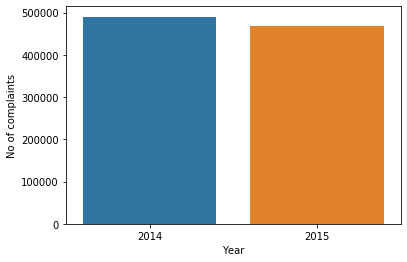

In [26]:
by_year = slctd_data['date'].dt.year.value_counts().to_frame()
sns.barplot(x=by_year.index,y='date',data=by_year)
plt.xlabel('Year')
plt.ylabel('No of complaints')
plt.show()

Remove unwanted entries in original dataset

In [15]:
df_crime = df_crime.dropna(subset=['CMPLNT_FR_DT'],axis=0)
df_crime = df_crime[indices]

#### Crime by Borough

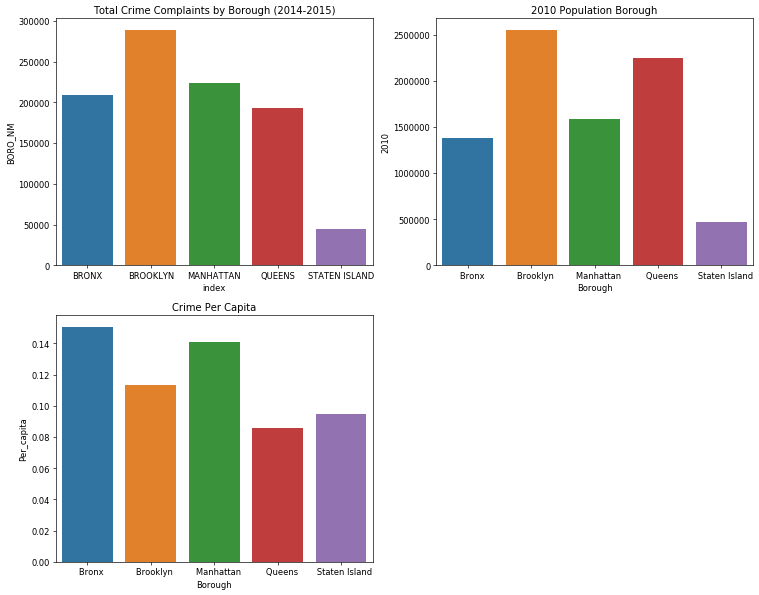

In [19]:
data_by_boro = df_crime['BORO_NM'].value_counts().to_frame().reset_index()
data_by_boro = data_by_boro.sort_values(by=['index']).reset_index(drop=True)

pop = df_pop[['Borough','2010']].iloc[1:]
pop['2010'] = pop['2010'].map(lambda x: int(x.replace(',','')))

crime_per_capita = pop.drop('2010',axis=1)
crime_per_capita['Per_capita'] = data_by_boro['BORO_NM'].values/pop['2010'].values

plt.figure(figsize=(15,12),dpi = 60)
plt.subplot(221); sns.barplot(x='index',y='BORO_NM',data=data_by_boro)
plt.title('Total Crime Complaints by Borough (2014-2015)')
plt.subplot(222); sns.barplot(x='Borough',y='2010',data=pop)
plt.title('2010 Population Borough')
plt.subplot(223); sns.barplot(x='Borough',y='Per_capita',data=crime_per_capita)
plt.title('Crime Per Capita')
plt.show()

#### Crime by month

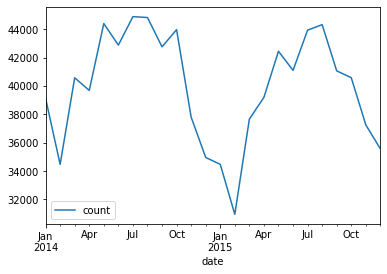

In [47]:
temp_df = slctd_data.copy()
temp_df['count'] = [1]*len(slctd_data)
by_month = temp_df[['date','count']].groupby(pd.Grouper(key='date',freq='M')).sum()
by_month.plot(kind='line')

#### Crime by time

Text(0.5, 0, 'time of the day (hrs)')

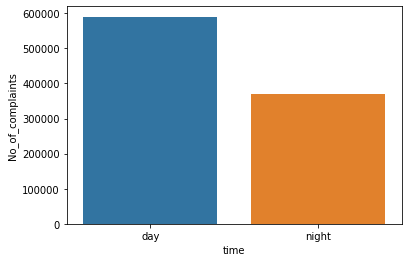

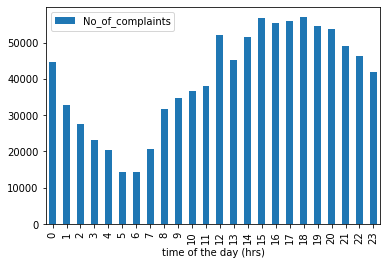

In [73]:
day_and_night = ((slctd_data['time'].dt.hour >= 7)&((slctd_data['time'].dt.hour <= 19))).value_counts().to_frame()
day_and_night.index = pd.Index(['day','night'],name='time')
day_and_night = day_and_night.rename(columns={'time':'No_of_complaints'})
sns.barplot(x=day_and_night.index,y='No_of_complaints',data=day_and_night)

by_hour = slctd_data['time'].dt.hour.value_counts(sort=False).to_frame()
by_hour = by_hour.rename(columns={'time':'No_of_complaints'})
by_hour.plot(kind='bar')
plt.xlabel('time of the day (hrs)')

#### Crime by Category

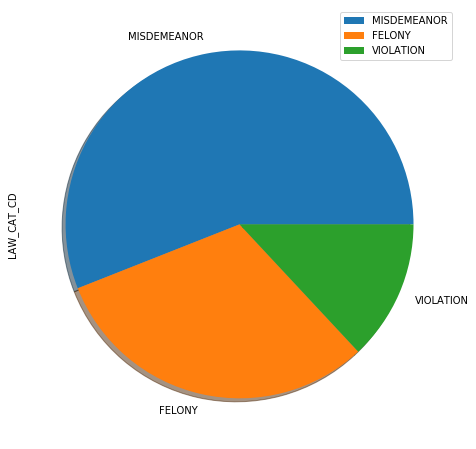

In [99]:
by_cat = df_crime['LAW_CAT_CD'].value_counts().to_frame()
by_cat.plot(kind='pie',y='LAW_CAT_CD',figsize=(8,8), shadow=True)

#### By offence description

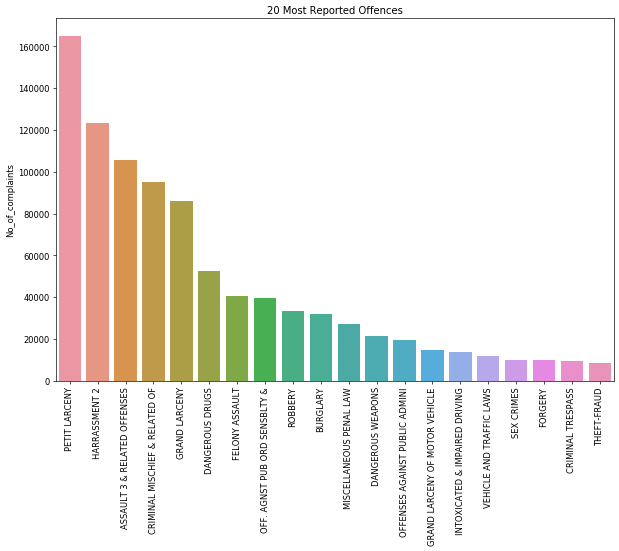

In [92]:
by_desc = df_crime['OFNS_DESC'].value_counts().to_frame().rename(columns={'OFNS_DESC':'No_of_complaints'})
to_plot = by_desc.head(20)
plt.figure(figsize=(12,8),dpi=60)
sns.barplot(x=to_plot.index,y='No_of_complaints',data=to_plot)
plt.xticks(rotation=90)
plt.title('20 Most Reported Offences')
plt.show()

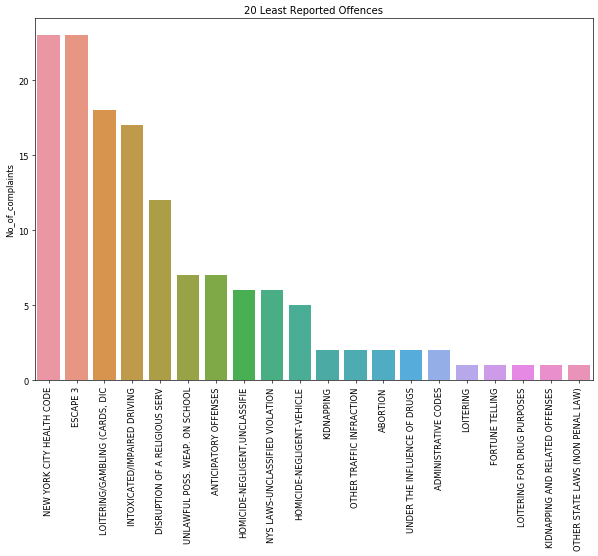

In [91]:
to_plot2 = by_desc.tail(20)
plt.figure(figsize=(12,8),dpi=60)
sns.barplot(x=to_plot2.index,y='No_of_complaints',data=to_plot2)
plt.xticks(rotation=90)
plt.title('20 Least Reported Offences')
plt.show()